<a href="https://colab.research.google.com/github/amirgarsha/ann_MK/blob/main/MK_ann_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
import matplotlib.pyplot as plt
import numpy as np


##Regression

In [3]:
## check dataset
california_housing = fetch_california_housing()

In [4]:
## split data
X_train0, X_test, y_train0,  y_test = train_test_split(california_housing["data"],
                                                    california_housing["target"])

In [5]:
## split train to train and validation
X_train1, X_validation, y_train1, y_validation = train_test_split(X_train0,
                                                                  y_train0)

In [6]:
## check shape of train and test
print(X_train1.shape)
print(X_test.shape)
print(X_validation.shape)

(11610, 8)
(5160, 8)
(3870, 8)


In [7]:
## Standardization
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train1)
X_validation_s = sc.transform(X_validation)
X_test_s = sc.transform(X_test)

Create Model

In [8]:
## create Model
model = keras.models.Sequential([
    keras.layers.Dense(50, activation="relu"),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)]
)

In [9]:
model.compile(loss="mean_squared_error",
              optimizer="sgd",
              metrics=["mean_absolute_error"])

In [10]:
history = model.fit(X_train_s, y_train1, epochs=30, validation_data=(X_validation_s, y_validation))

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.6542 - mean_absolute_error: 0.5676 - val_loss: 2.6287 - val_mean_absolute_error: 0.5215
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4734 - mean_absolute_error: 0.4785 - val_loss: 0.6217 - val_mean_absolute_error: 0.4537
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4062 - mean_absolute_error: 0.4521 - val_loss: 2.4929 - val_mean_absolute_error: 0.4639
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4422 - mean_absolute_error: 0.4556 - val_loss: 0.8343 - val_mean_absolute_error: 0.4568
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.3843 - mean_absolute_error: 0.4404 - val_loss: 0.3583 - val_mean_absolute_error: 0.4296
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3618 - mean_absolute_error: 0.4292 - val_loss: 0.3459 - val_mean_absolute_error: 0.4140
Epoch 7/30
363/3

## Functional API

In [11]:
X_train0.shape[1:]

(8,)

In [12]:
input_layer = keras.layers.Input(shape=X_train1.shape[1:])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
cancatenate_layer = keras.layers.Concatenate()([input_layer, hidden_layer_2])
output_layer = keras.layers.Dense(1)(cancatenate_layer)
model_conc = keras.Model(inputs=[input_layer], outputs=[output_layer])


In [13]:
model_conc.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8)]                  0         []                            
                                                                                                  
 dense_3 (Dense)             (None, 50)                   450       ['input_1[0][0]']             
                                                                                                  
 dense_4 (Dense)             (None, 10)                   510       ['dense_3[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 18)                   0         ['input_1[0][0]',             
                                                                     'dense_4[0][0]']         

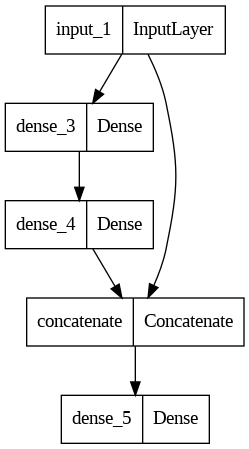

In [14]:
keras.utils.plot_model(model_conc, "model_pic.png")

In [15]:
model_conc.compile(loss="mean_squared_error",
                   optimizer="sgd",
                   metrics="mean_absolute_error")

In [16]:
model_conc.fit(X_train_s, y_train1, epochs = 30,
               validation_data = (X_validation_s, y_validation) )

Epoch 1/30
363/363 [==============================] - 3s 6ms/step - loss: 0.6950 - mean_absolute_error: 0.5826 - val_loss: 0.4819 - val_mean_absolute_error: 0.4910
Epoch 2/30
363/363 [==============================] - 2s 5ms/step - loss: 0.5814 - mean_absolute_error: 0.4909 - val_loss: 2.0662 - val_mean_absolute_error: 0.5027
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4647 - mean_absolute_error: 0.4733 - val_loss: 1.2981 - val_mean_absolute_error: 0.4844
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5609 - mean_absolute_error: 0.4903 - val_loss: 3.8230 - val_mean_absolute_error: 0.4951
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5460 - mean_absolute_error: 0.4858 - val_loss: 9.7703 - val_mean_absolute_error: 0.5235
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7589 - mean_absolute_error: 0.5362 - val_loss: 13.8318 - val_mean_absolute_error: 0.5590
Epoch 7/30
363/

## funcitonal API with multiple input

In [17]:
X_train_s_1, X_train_s_2 = X_train_s[: , :6], X_train_s[: , -4:]
X_validation_s_1, X_validation_s_2 = X_validation_s[: , :6], X_validation_s[: , -4:]
X_test_s_1, X_test_s_2 = X_test_s[: , :6], X_test_s[: , -4:]

In [18]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1)(concatenation_layer)
model_multiple = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer])

In [19]:
model_multiple.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_6 (Dense)             (None, 50)                   350       ['input_2[0][0]']             
                                                                                                  
 input_3 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_7 (Dense)             (None, 10)                   510       ['dense_6[0][0]']             
                                                                                            

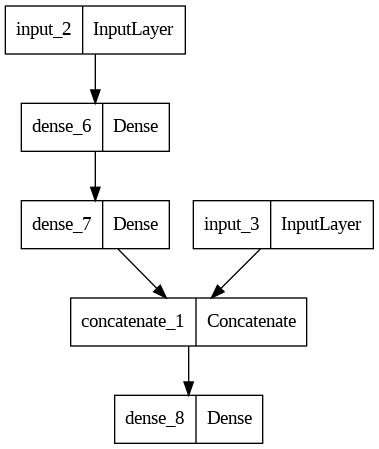

In [20]:
keras.utils.plot_model(model_multiple, "multiple_model.png")

In [21]:
model_multiple.compile(loss="mean_squared_error",
                       optimizer="sgd",
                       metrics="mean_absolute_error")

In [22]:
model_multiple.fit((X_train_s_1, X_train_s_2), y_train1, epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), y_validation))

Epoch 1/30
363/363 [==============================] - 1s 3ms/step - loss: 0.9153 - mean_absolute_error: 0.6341 - val_loss: 11.8382 - val_mean_absolute_error: 0.5952
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6806 - mean_absolute_error: 0.5375 - val_loss: 56.4963 - val_mean_absolute_error: 0.7611
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 3.0315 - mean_absolute_error: 0.7929 - val_loss: 5.5191 - val_mean_absolute_error: 0.5288
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 1.1762 - mean_absolute_error: 0.4974 - val_loss: 398.9437 - val_mean_absolute_error: 2.6060
Epoch 5/30
363/363 [==============================] - 1s 4ms/step - loss: 4.3766 - mean_absolute_error: 0.9973 - val_loss: 2602.5581 - val_mean_absolute_error: 3.0539
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 14961984579567616.0000 - mean_absolute_error: 5603868.0000 - val_loss: 40079091302400.0000 - val_me

## with multiple output

In [23]:
input_layer_1 = keras.layers.Input(shape=[6])
input_layer_2 = keras.layers.Input(shape=[4])
hidden_layer_1 = keras.layers.Dense(50, activation="relu")(input_layer_1)
hidden_layer_2 = keras.layers.Dense(10, activation="relu")(hidden_layer_1)
concatenation_layer = keras.layers.Concatenate()([input_layer_2, hidden_layer_2])
output_layer = keras.layers.Dense(1, name="output_layer")(concatenation_layer)
helper_output = keras.layers.Dense(1,name = "helper_output")(hidden_layer_2)
model_multiple_output = keras.Model(inputs=[input_layer_1, input_layer_2], outputs=[output_layer, helper_output])

In [24]:
model_multiple_output.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_9 (Dense)             (None, 50)                   350       ['input_4[0][0]']             
                                                                                                  
 input_5 (InputLayer)        [(None, 4)]                  0         []                            
                                                                                                  
 dense_10 (Dense)            (None, 10)                   510       ['dense_9[0][0]']             
                                                                                            

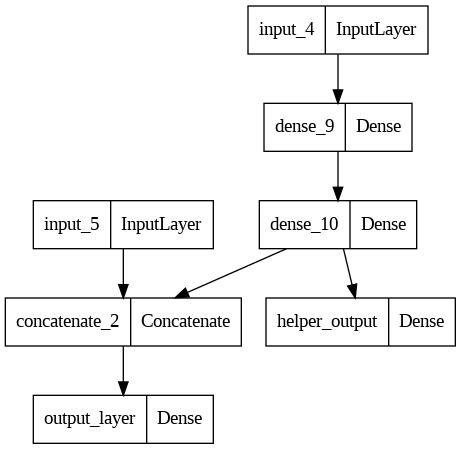

In [25]:
keras.utils.plot_model(model_multiple_output, "multiple_model.png")

In [26]:
model_multiple_output.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [27]:
model_multiple_output.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.8355 - output_layer_loss: 0.7359 - helper_output_loss: 1.2338 - output_layer_mae: 0.6117 - helper_output_mae: 0.7828 - val_loss: 0.8035 - val_output_layer_loss: 0.8482 - val_helper_output_loss: 0.6248 - val_output_layer_mae: 0.5245 - val_helper_output_mae: 0.5886
Epoch 2/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5416 - output_layer_loss: 0.5329 - helper_output_loss: 0.5764 - output_layer_mae: 0.5129 - helper_output_mae: 0.5664 - val_loss: 2.3349 - val_output_layer_loss: 2.3680 - val_helper_output_loss: 2.2025 - val_output_layer_mae: 0.5234 - val_helper_output_mae: 0.5861
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.5997 - output_layer_loss: 0.5958 - helper_output_loss: 0.6152 - output_layer_mae: 0.5262 - helper_output_mae: 0.5538 - val_loss: 2.8034 - val_output_layer_loss: 1.2044 - val_helper_output_loss: 9.1996 - val_output_layer_mae: 0.4903 - val_helper

## Subclass Model

In [32]:
class WideAndDeepAnn(keras.Model):
  def __init__(self, activation="relu", **kwargs):
    super().__init__(**kwargs)
    self.hidden_layer1 = keras.layers.Dense(50, activation = activation)
    self.hidden_layer2 = keras.layers.Dense(10, activation = activation)
    self.final_output = keras.layers.Dense(1)
    self.helper_output = keras.layers.Dense(1)

  def call(self, inputs):
    input_1, input_2 = inputs
    h1_out = self.hidden_layer1(input_1)
    h2_out = self.hidden_layer2(h1_out)
    concat_out = keras.layers.concatenate([input_1, h2_out])
    final_output = self.final_output(concat_out)
    helper_output = self.helper_output(h2_out)
    return final_output, helper_output



In [33]:
subclass_model = WideAndDeepAnn()

In [34]:
subclass_model.compile(loss=["mse", "mse"],
                              loss_weights = [0.8, 0.2],
                              optimizer="sgd",
                              metrics=["mae"])

In [35]:
subclass_model.fit((X_train_s_1, X_train_s_2), (y_train1, y_train1), epochs = 30,
                   validation_data=((X_validation_s_1,X_validation_s_2), (y_validation,y_validation)))

Epoch 1/30
363/363 [==============================] - 3s 4ms/step - loss: 1.3426 - output_1_loss: 1.3085 - output_2_loss: 1.4791 - output_1_mae: 0.7172 - output_2_mae: 0.8463 - val_loss: 12.6377 - val_output_1_loss: 15.5516 - val_output_2_loss: 0.9818 - val_output_1_mae: 0.6778 - val_output_2_mae: 0.6019
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.7588 - output_1_loss: 0.8023 - output_2_loss: 0.5851 - output_1_mae: 0.6065 - output_2_mae: 0.5575 - val_loss: 11.9389 - val_output_1_loss: 14.7817 - val_output_2_loss: 0.5673 - val_output_1_mae: 0.6569 - val_output_2_mae: 0.5454
Epoch 3/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6246 - output_1_loss: 0.6414 - output_2_loss: 0.5575 - output_1_mae: 0.5670 - output_2_mae: 0.5370 - val_loss: 22.3770 - val_output_1_loss: 27.8403 - val_output_2_loss: 0.5238 - val_output_1_mae: 0.6529 - val_output_2_mae: 0.5344
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5472 -